## Text Mining - Shark Tank Dataset

In [6]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Step 1: Pick out the Deal (Dependent Variable) and Description columns
df = pd.read_csv('shark_tank_data.csv')
df = df[['deal', 'description']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Step 2: Create two corpora, one with those who secured a Deal, the other with those who did not secure a deal.
corpus_deal = df[df['deal'] == True]['description']
corpus_no_deal = df[df['deal'] == False]['description']

In [8]:
# Step 3a: Find the number of characters for both the corpuses.
print("Number of characters in corpus with Deal:", sum([len(text) for text in corpus_deal]))
print("Number of characters in corpus without Deal:", sum([len(text) for text in corpus_no_deal]))

Number of characters in corpus with Deal: 64060
Number of characters in corpus without Deal: 47184


In [9]:
# Step 3b: Remove Stop Words from the corpora.
stop_words= set(stopwords.words("english"))
stop_words.update(['also', 'made', 'makes', 'like', 'this', 'even', 'company'])


In [10]:
def remove_stop_words(corpus):
    new_corpus = []
    for text in corpus:
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]
        words = [word for word in words if word not in stop_words]
        new_corpus.append(" ".join(words))
    return new_corpus


In [11]:
corpus_deal

1      Retail and wholesale pie factory with two reta...
2      Ava the Elephant is a godsend for frazzled par...
5      One of the first entrepreneurs to pitch on Sha...
9      An educational record label and publishing hou...
10     A battery-operated cooking device that siphons...
                             ...                        
489    SynDaver Labs makes synthetic body parts for u...
490    Zoom Interiors is a virtual service for interi...
491    Spikeball started out as a casual outdoors gam...
492    Shark Wheel is out to literally reinvent the w...
494    Sway Motorsports makes a three-wheeled, all-el...
Name: description, Length: 251, dtype: object

In [13]:
nltk.download('punkt')
corpus_deal = remove_stop_words(corpus_deal)
corpus_no_deal = remove_stop_words(corpus_no_deal)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
corpus_no_deal

['bluetooth device implant ear',
 'organizing packing moving services delivered college women',
 'interactive media centers healthcare waiting rooms offering patients web access educational information',
 'mixed martial arts clothing line looking become next big brand active sports streetwear apparel',
 'attach noted detachable arm holds notes side laptop screen',
 'safety device seatbelts prevents driver starting vehicle unless seatbelt buckled',
 'household items twist recycled chopsticks',
 'guitars folding neck designed fit backpack overhead compartment airplane',
 'state capitals fun minutes efficient entertaining method learn us geography set flash cards combines phonetics cartoons associations keep kids interest drive learning retention author ken bradford worked closely public private school teachers develop fun satisfying study aide',
 'offering professional graffiti removal',
 'owns trademarks words coffee cappuccino java words use plush toys',
 'inspirational gifts accessori

In [15]:
# Step 3c: What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?
from collections import Counter

def get_top_words(corpus, top_n=3):
    words = " ".join(corpus).split()
    return [word[0] for word in Counter(words).most_common(top_n)]

print("Top words in corpus with Deal:", get_top_words(corpus_deal))
print("Top words in corpus without Deal:", get_top_words(corpus_no_deal))



Top words in corpus with Deal: ['make', 'children', 'products']
Top words in corpus without Deal: ['make', 'use', 'water']


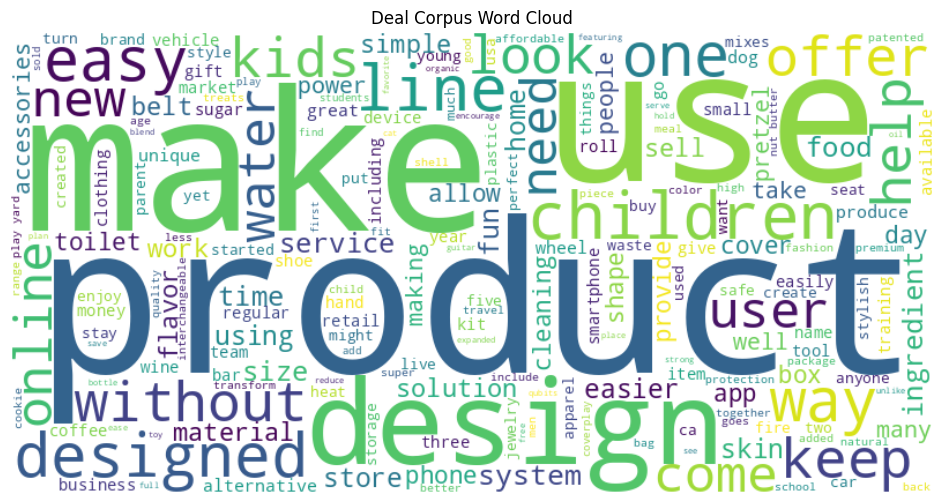

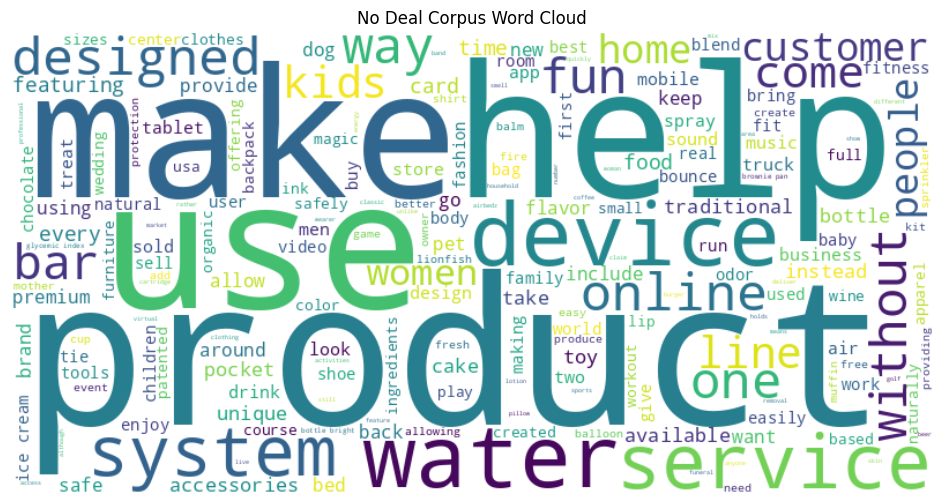

In [16]:

def plot_wordcloud(corpus, title):
    wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(" ".join(corpus))
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for both corpora
plot_wordcloud(corpus_deal, 'Deal Corpus Word Cloud')
plot_wordcloud(corpus_no_deal, 'No Deal Corpus Word Cloud')